In [187]:
# Usual Imports
import pandas as pd
import sys

# Configuration
Change the variable data_path to your local git repo path

In [188]:
#Path to raw_data -> change it localy
data_path =  "C:/Users/marco/IdeaProjects/ml-corona/data/"


raw_data_path = f"{data_path}raw_data/"
stripped_data_path = f"{data_path}stripped_data/"


In [189]:
#Quality Check
number_of_rows = 0

In [190]:
def extract_CH_entries(csv_filename, new_column_name):
    data = pd.read_csv(f"{raw_data_path}{csv_filename}", index_col = 1, encoding = "UTF-8")
    #Remove all not having geoRegion = 'CH'
    data = data[data['geoRegion'] == 'CH']
    #New dataframe with only datum and data
    data = data[['entries']]
    data =  data.rename({'entries': new_column_name}, axis=1, inplace=False)
    return data

def verify_row_number(all_data,number_of_rows):
    new_number_of_rows = all_data.shape[0]
    if new_number_of_rows > number_of_rows:
        sys.exit(f"Number of rows increased from {number_of_rows} to {new_number_of_rows}!")

# Cases


In [191]:
cases = extract_CH_entries('COVID19Cases_geoRegion.csv','cases')
all_data = cases
number_of_rows = all_data.shape[0]
all_data.head

<bound method NDFrame.head of             cases
datum            
2020-02-24      1
2020-02-25      1
2020-02-26     10
2020-02-27     10
2020-02-28     10
...           ...
2021-12-02  10081
2021-12-03   8951
2021-12-04   4822
2021-12-05   2744
2021-12-06      9

[652 rows x 1 columns]>

# Certificate

In [192]:
#Read certificate
certificate = pd.read_csv(f"{raw_data_path}COVID19Certificates.csv", index_col = 0, encoding = "UTF-8")
#Reorgainisation of columns. Values of rows in column type_variant are 'all', 'recovered', 'tested','vaccinated'. Generate columns for every value.
certificate = certificate.pivot_table('entries', ['date'], 'type_variant')
certificate = certificate.rename({'all': 'certificate_all', 'recovered' : 'certificate_recovered', 'tested' : 'certificate_tested', 'vaccinated' : 'certificate_vacinated'}, axis=1, inplace=False)
#join the certificate to all_data
all_data = all_data.join(certificate, how='left',rsuffix='_other')
verify_row_number(all_data,number_of_rows)
all_data.head

<bound method NDFrame.head of             cases  certificate_all  certificate_recovered  certificate_tested  \
datum                                                                           
2020-02-24      1              NaN                    NaN                 NaN   
2020-02-25      1              NaN                    NaN                 NaN   
2020-02-26     10              NaN                    NaN                 NaN   
2020-02-27     10              NaN                    NaN                 NaN   
2020-02-28     10              NaN                    NaN                 NaN   
...           ...              ...                    ...                 ...   
2021-12-02  10081         137832.0                 8828.0             59039.0   
2021-12-03   8951         210437.0                 9887.0            126162.0   
2021-12-04   4822         133322.0                 6974.0             89945.0   
2021-12-05   2744          52858.0                 5909.0             33768.0  

# Vaccinations

shape all (90170, 12)
shape only ch and total_population (1400, 12)
shape pivot (350, 4)


<bound method NDFrame.head of             cases  certificate_all  certificate_recovered  certificate_tested  \
datum                                                                           
2020-02-24      1              NaN                    NaN                 NaN   
2020-02-25      1              NaN                    NaN                 NaN   
2020-02-26     10              NaN                    NaN                 NaN   
2020-02-27     10              NaN                    NaN                 NaN   
2020-02-28     10              NaN                    NaN                 NaN   
...           ...              ...                    ...                 ...   
2021-12-02  10081         137832.0                 8828.0             59039.0   
2021-12-03   8951         210437.0                 9887.0            126162.0   
2021-12-04   4822         133322.0                 6974.0             89945.0   
2021-12-05   2744          52858.0                 5909.0             33768.0  

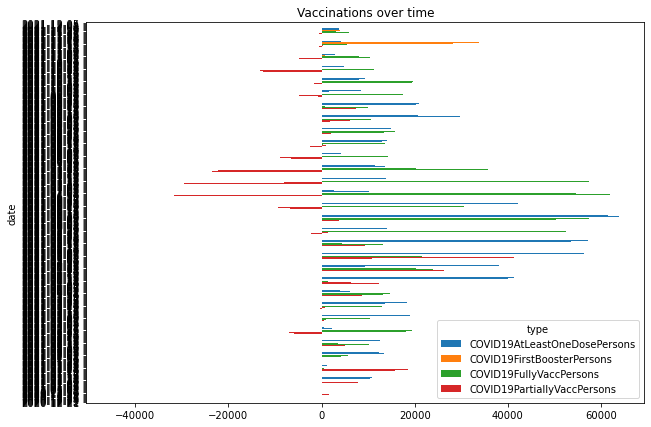

In [183]:
vaccination = pd.read_csv(f"{raw_data_path}COVID19VaccPersons_v2.csv", index_col = 0, encoding = "UTF-8")
print(f"shape all {vaccination.shape}")

#Remove all not having geoRegion = 'CH'
vaccination = vaccination[vaccination['geoRegion'] == 'CH']
#Only look in age_group == 'total_population'
vaccination = vaccination[vaccination['age_group'] == 'total_population']
print(f"shape only ch and total_population {vaccination.shape}")

pivot = vaccination.pivot_table(values="entries", index=vaccination.index, columns="type", aggfunc='first')
print(f"shape pivot {pivot.shape}")

pivot.plot.barh(figsize=(10,7),title='Vaccinations over time')

all_data = all_data.join(pivot, how='left',rsuffix='_other')
verify_row_number(all_data,number_of_rows)



all_data.head

# Hospitalisation

In [184]:
hopsitalisation = extract_CH_entries('COVID19Hosp_geoRegion.csv','hopsitalisation')
#join the certificate to all_data
all_data = all_data.join(hopsitalisation, how='left',rsuffix='_other')
verify_row_number(all_data,number_of_rows)
all_data.head

<bound method NDFrame.head of             cases  certificate_all  certificate_recovered  certificate_tested  \
datum                                                                           
2020-02-24      1              NaN                    NaN                 NaN   
2020-02-25      1              NaN                    NaN                 NaN   
2020-02-26     10              NaN                    NaN                 NaN   
2020-02-27     10              NaN                    NaN                 NaN   
2020-02-28     10              NaN                    NaN                 NaN   
...           ...              ...                    ...                 ...   
2021-12-02  10081         137832.0                 8828.0             59039.0   
2021-12-03   8951         210437.0                 9887.0            126162.0   
2021-12-04   4822         133322.0                 6974.0             89945.0   
2021-12-05   2744          52858.0                 5909.0             33768.0  

# Death

In [185]:

death = extract_CH_entries('COVID19Death_geoRegion.csv','death')
#join the death to all_data
all_data = all_data.join(death, how='left',rsuffix='_other')
verify_row_number(all_data,number_of_rows)
all_data.head

<bound method NDFrame.head of             cases  certificate_all  certificate_recovered  certificate_tested  \
datum                                                                           
2020-02-24      1              NaN                    NaN                 NaN   
2020-02-25      1              NaN                    NaN                 NaN   
2020-02-26     10              NaN                    NaN                 NaN   
2020-02-27     10              NaN                    NaN                 NaN   
2020-02-28     10              NaN                    NaN                 NaN   
...           ...              ...                    ...                 ...   
2021-12-02  10081         137832.0                 8828.0             59039.0   
2021-12-03   8951         210437.0                 9887.0            126162.0   
2021-12-04   4822         133322.0                 6974.0             89945.0   
2021-12-05   2744          52858.0                 5909.0             33768.0  

In [186]:
#save dataframe
all_data.to_csv(f"{stripped_data_path}all_data.csv",index=True)